In [1]:
import torch.nn.functional as F
from torchvision.transforms.functional import crop

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
img = torch.tensor(np.array(Image.open("/NAS5/speech/user/richamishra/paii_virtual_being_3d/img2img-turbo/data/jo_overfit/test_B/00001.png")))
print(img.shape)

torch.Size([512, 512, 4])


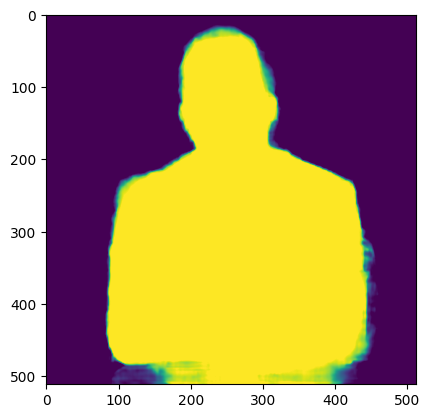

In [4]:
plt.imshow(img[:,:,3])

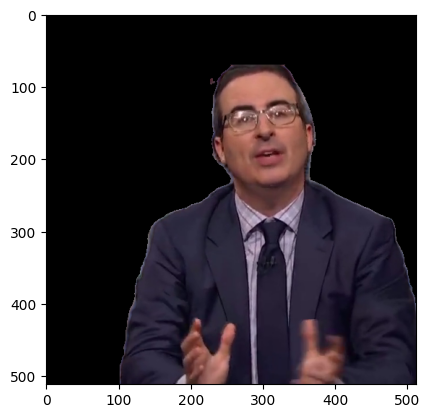

In [14]:
a_crop = crop(img, -70, -70, 512, 512)
a = a_crop.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

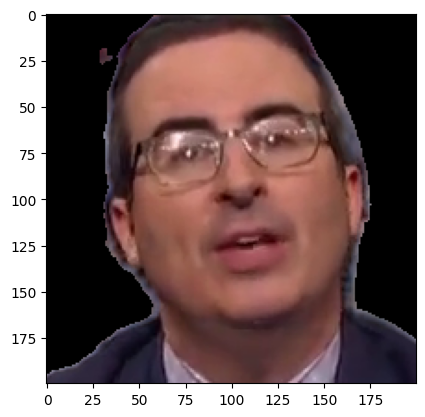

In [15]:
a_face = crop(a_crop, 70, 70+128, 200, 200)
a = a_face.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

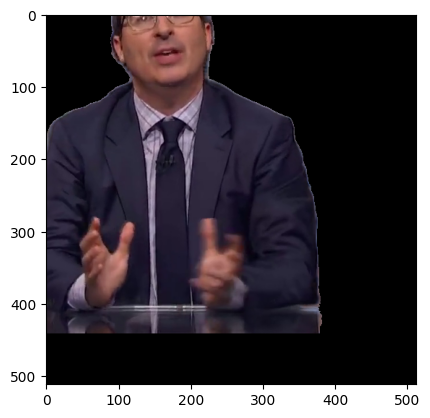

In [16]:
a_crop = crop(img, 70, 70, 512, 512)
a = a_crop.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

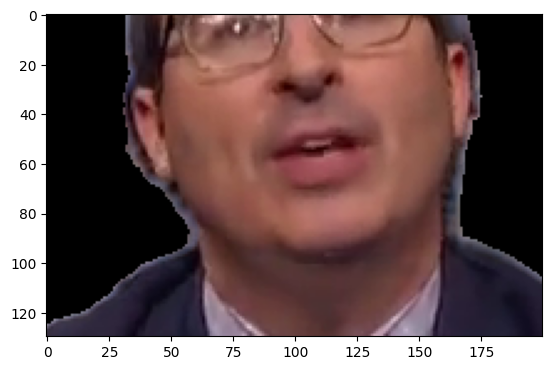

In [18]:
a_face = crop(a_crop, 0, 128-70, 200-70, 200)
a = a_face.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

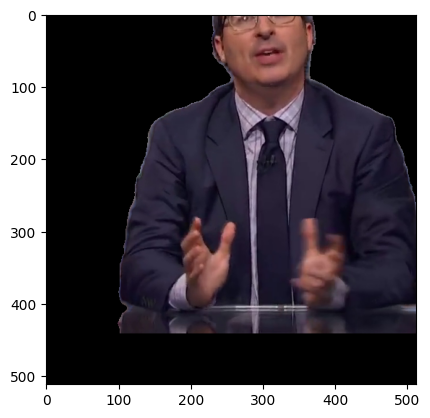

In [19]:
a_crop = crop(img, 70, -70, 512, 512)
a = a_crop.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

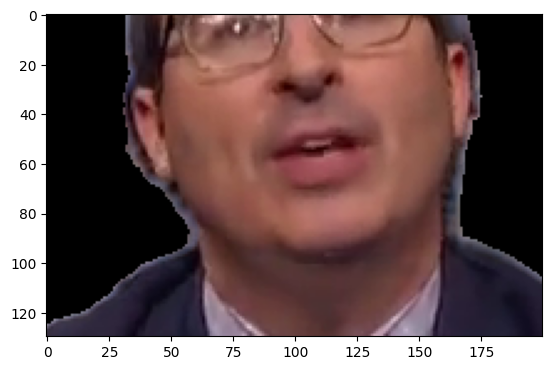

In [21]:
a_face = crop(a_crop, 0, 128+70, 200-70, 200)
a = a_face.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

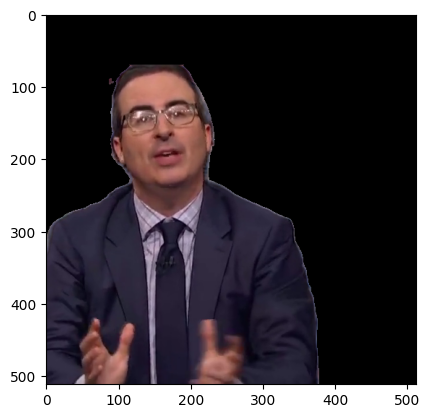

In [22]:
a_crop = crop(img, -70, 70, 512, 512)
a = a_crop.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

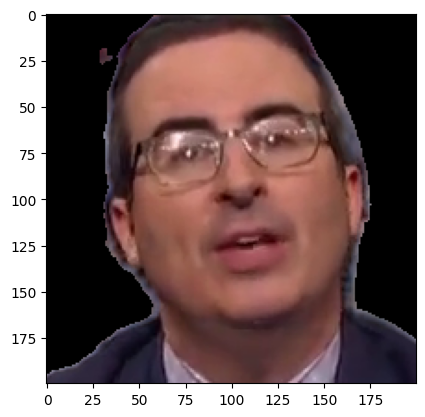

In [25]:
a_face = crop(a_crop, 70, 128-70, 200, 200)
a = a_face.permute(1,2,0).detach().cpu().numpy()
plt.imshow(a)

In [1]:
from src.warping import *
from src.pix2pix_turbo import Pix2Pix_Turbo
import torch

/media/workspace/richamishra/miniconda3/envs/img2img-turbo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
q = torch.rand((1,3,64,64))
k = torch.rand((1,6,64,64))
print(q.shape, k.shape)

torch.Size([1, 3, 64, 64]) torch.Size([1, 6, 64, 64])


In [15]:
k_unet = k_unet(6)
q_unet = q_unet(3)

In [20]:
for p in k_unet.parameters():
    print(p.shape)

torch.Size([256, 6, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([1024, 512, 3, 3])
torch.Size([1024])
torch.Size([1024, 1024, 3, 3])
torch.Size([1024])
torch.Size([1024, 1024, 3, 3])
torch.Size([1024])
torch.Size([512, 2048, 3, 3])
torch.Size([512])
torch.Size([256, 1024, 3, 3])
torch.Size([256])
torch.Size([128, 512, 3, 3])
torch.Size([128])
torch.Size([256, 134, 3, 3])
torch.Size([256])


In [4]:
k = k_unet(k)
q = q_unet(q)

print(k.shape, q.shape)

torch.Size([1, 256, 64, 64]) torch.Size([1, 256, 64, 64])


In [5]:
k = k.reshape([1,256,-1])
q = q.reshape([1,256,-1])
k.shape, q.shape

(torch.Size([1, 256, 4096]), torch.Size([1, 256, 4096]))

In [6]:
q[0].T.shape

torch.Size([4096, 256])

In [15]:
w = torch.nn.Softmax(q[0].T@k[0]/16)
w.dim.shape

torch.Size([16384, 16384])

In [2]:
net_pix2pix = Pix2Pix_Turbo()


Initializing model with random weights


In [3]:
net_pix2pix

Pix2Pix_Turbo(
  (text_encoder): CLIPTextModel(
    (text_model): CLIPTextTransformer(
      (embeddings): CLIPTextEmbeddings(
        (token_embedding): Embedding(49408, 1024)
        (position_embedding): Embedding(77, 1024)
      )
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-22): 23 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): GELUActivation()
              (fc1): Linear(in_features=1024, out_features=4096, bias=True)
              (fc2): Linear(in_features=4096, out_features

In [8]:
img = torch.rand((1,3,512,512)).to("cuda")
#a = net_pix2pix(img, prompt="testing image thing")

In [12]:
encode = net_pix2pix.vae.encode(img).latent_dist.sample()

In [14]:
k_unet.parameters()

TypeError: Module.parameters() missing 1 required positional argument: 'self'

In [23]:
a = torch.rand((1,64, 256))
b = torch.rand(1, 256, 38)

c = a@b
c.shape

torch.Size([1, 64, 38])

In [1]:
from diffusers import UNet2DConditionModel
#from src.unet_2d_condition import UNet2DConditionModel

unet = UNet2DConditionModel.from_pretrained("stabilityai/sd-turbo", subfolder="unet")

/media/workspace/richamishra/miniconda3/envs/img2img-turbo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
for n, _p in unet.named_parameters():
    
    if "attn1" in n:
        print(n)


down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.bias
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_k.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_v.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_out.0.bias
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out